# Tilapia Fish Feed Modelling

##Theory

The growth rate of tilapia is controlled by water quality. temperature and feeding rates. If the water is correct tilapia like to eat more than almost anything else. Feeding four or five times a day is best as the tilapia digestive system runs on a two to three hour schedule. A basis for how much to feed can be calculated from the chart below.

Source:https://www.rdaquafarms.com/Tips.html


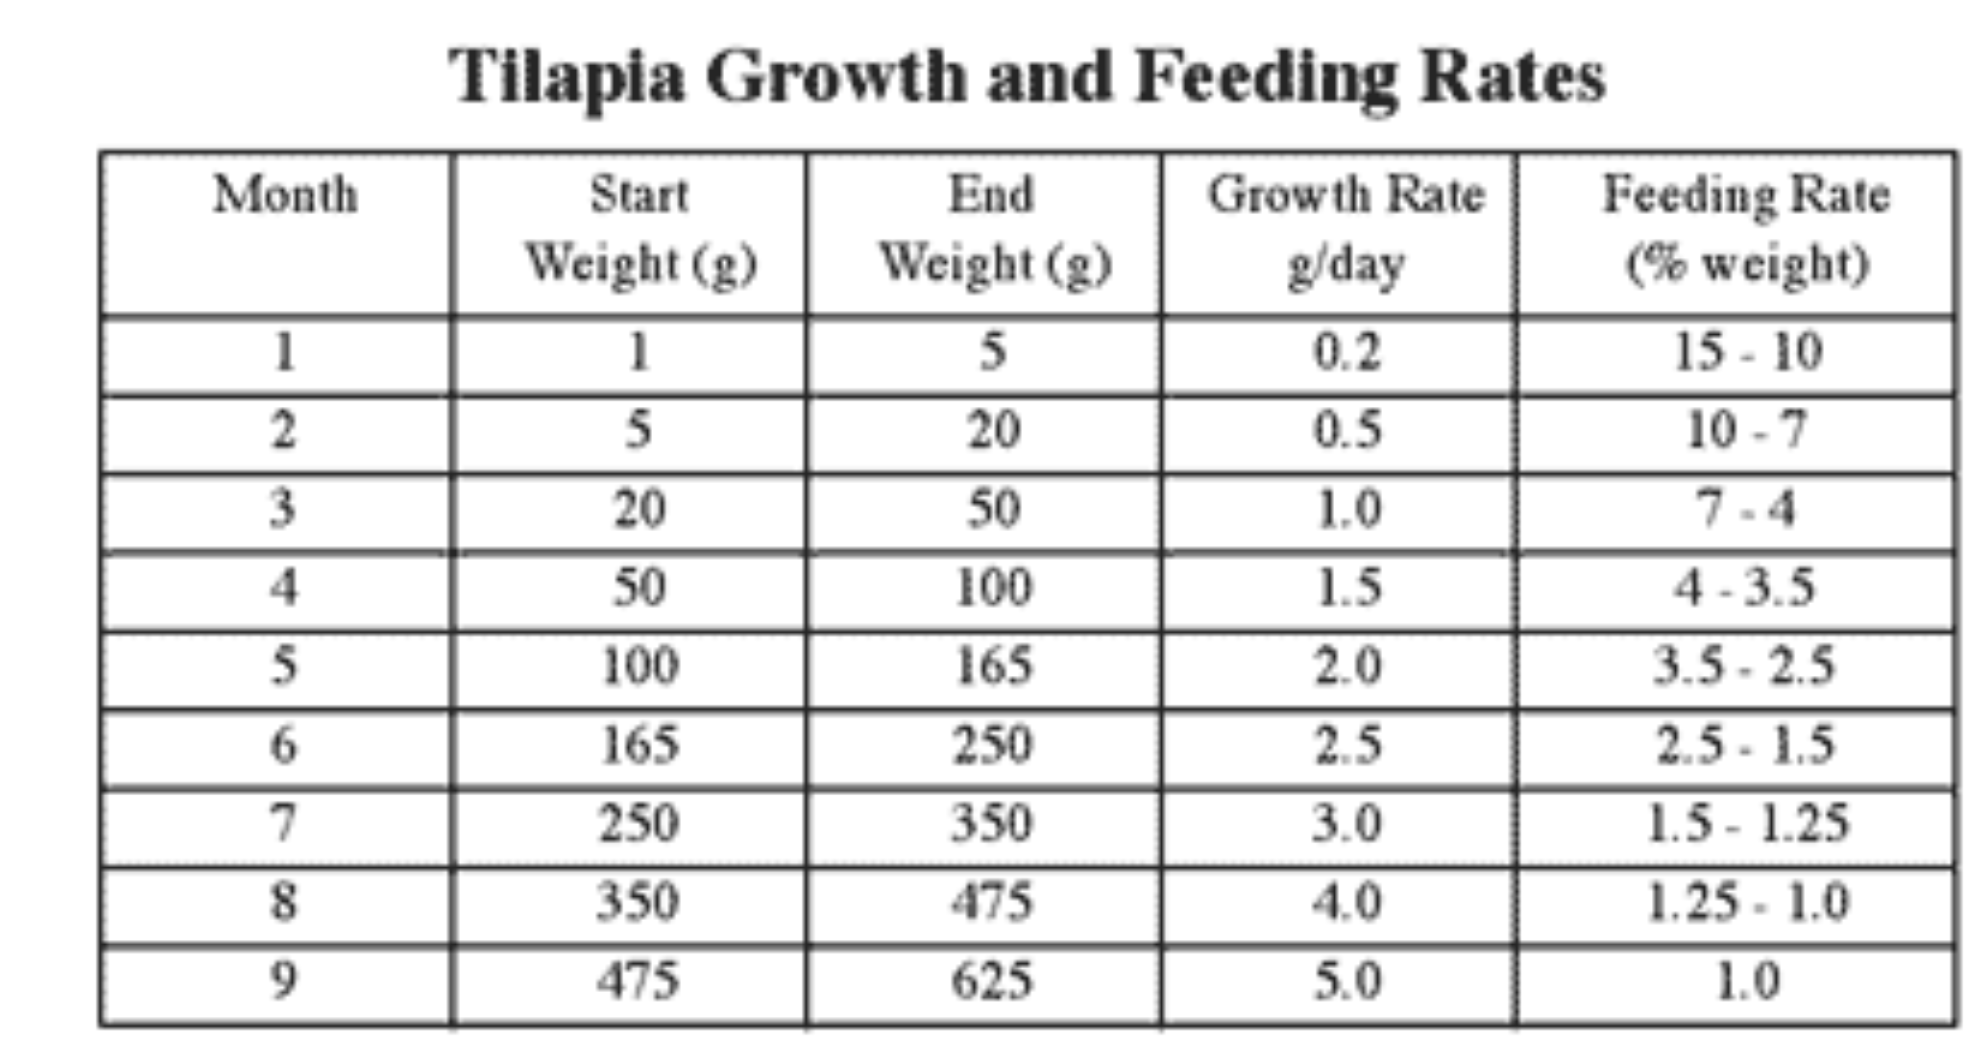

Let's say you have about 100 fish that weigh 35 grams each. Your tank will have 3500 grams of fish to be fed.

From the chart you can see that 35 gram fish should be fed about 4% - 7% of their body weight per day.

We'll take 5.5% for this example because the 35 gram fish are in the middle of the weight range on the chart.

 5.5% of the 3500 grams of fish we have is 192.5 grams of food.

 We can then split the 192.5 grams of food in fourths to make the four feedings for the day.

##Code

In [30]:
import pandas as pd
import numpy as np
import random


In [31]:
import pandas as pd

# Initialize
data = []
current_day = 1
months_data = [
    [1, 5, 0.15, 0.10],
    [5, 20, 0.10, 0.07],
    [20, 50, 0.07, 0.045],
    [50, 100, 0.045, 0.035],
    [100, 165, 0.035, 0.0275],
    [165, 250, 0.0275, 0.02375],
    [250, 350, 0.02375, 0.01875],
    [350, 475, 0.01875, 0.0175],
    [475, 625, 0.0175, 0.01]
]

# Loop for each month
for month in months_data:
    start_weight, end_weight, start_feedrate, end_feedrate = month
    daily_growth = (end_weight - start_weight) / 30
    daily_feedrate_decrease = (start_feedrate - end_feedrate) / 30

    for day in range(1, 31):
        fish_weight_for_day = start_weight + (day - 1) * daily_growth
        feed_rate_for_day = start_feedrate - (day - 1) * daily_feedrate_decrease
        feed_in_grams_for_day = fish_weight_for_day * feed_rate_for_day

        data.append([current_day, feed_in_grams_for_day])
        current_day += 1

# Generate CSV
df = pd.DataFrame(data, columns=['Day', 'FeedInGrams'])
df.to_csv('tilapia_feeding_schedule.csv', index=False)


In [32]:
df.dropna()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Divide the data into three parts
X = df.drop('FeedInGrams', axis=1)
y = df['FeedInGrams']

In [33]:
# Split the dataset into features (inputs) and labels (outputs)
features = df["Day"].to_numpy()
labels = df[["FeedInGrams"]].to_numpy()

In [34]:
from sklearn.model_selection import train_test_split
# Split the dataset into a training set and a test set with shuffling
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, shuffle=True)



Epoch 1/100
4/4 [==============================] - 1s 58ms/step - loss: 91.8219 - mse: 91.8219 - val_loss: 31.4616 - val_mse: 31.4616
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 12.3543 - mse: 12.3543 - val_loss: 1.4134 - val_mse: 1.4134
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 2.1619 - mse: 2.1619 - val_loss: 3.9299 - val_mse: 3.9299
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 3.3900 - mse: 3.3900 - val_loss: 3.0940 - val_mse: 3.0940
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 2.3045 - mse: 2.3045 - val_loss: 1.6040 - val_mse: 1.6040
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.9842 - mse: 0.9842 - val_loss: 0.4297 - val_mse: 0.4297
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.2585 - mse: 0.2585 - val_loss: 0.2481 - val_mse: 0.2481
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 0.4481 - mse

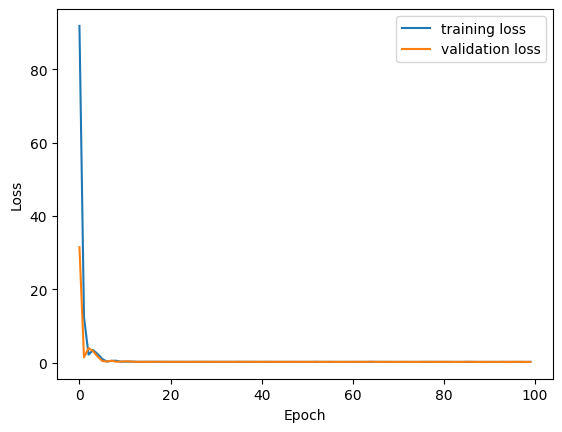

2/2 [==============================] - 0s 6ms/step
MAE: 0.25185274579544614
MSE: 0.18613290559501114


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow import keras
# Create and compile the model
MODEL = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)
])

MODEL.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mse'])

# Train the model on unscaled data
history = MODEL.fit(X_train, y_train, epochs=100, validation_split=0.5)

# Plot the learning rate loss graph
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the unscaled test set
y_pred = MODEL.predict(X_test)

# Calculate Mean Absolute Error (MAE) and Mean Squared Error (MSE) on the original scale
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')


In [36]:
def weights_to_cpp(model, filename="weights_and_biases.txt"):
    model.summary()
    weights = []
    biases = []
    for l in range(len(model.layers)):
        W, B = model.layers[l].get_weights()
        weights.append(W.flatten())
        biases.append(B.flatten())

    z = []
    b = []
    for i in np.array(weights):
        for l in i:
            z.append(l)
    for i in np.array(biases):
        for l in i:
            b.append(l)
    with open(filename, "w") as f:
      f.write("weights: {")
      for i in range(len(z)):
        if (i < len(z)-1):
          f.write(str(z[i])+", ")
        else:
          f.write(str(z[i]))
      f.write("}\n\n")

      f.write("biases: {")
      for i in range(len(b)):
        if (i < len(b)-1):
          f.write(str(b[i])+", ")
        else:
          f.write(str(b[i]))
      f.write("}\n\n")

      arch = []

      arch.append(model.layers[0].input_shape[1])
      for i in range(1, len(model.layers)):
          arch.append(model.layers[i].input_shape[1])
      arch.append(model.layers[len(model.layers)-1].output_shape[1])
      f.write("Architecture: {")
      for i in range(len(arch)):
          if (i < len(arch)-1):
              f.write(str(arch[i])+", ")
          else:
              f.write(str(arch[i]))
      f.write("}")
      print("Architecture (alpha):", arch)
      print("Layers: ", len(arch))
    print("Weights: ", z)
    print("Biases: ", b)




In [37]:
weights_to_cpp(MODEL, filename="weights_and_biases.txt")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                128       
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 8)                 136       
                                                                 
 dense_24 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Architecture (alpha)

<ipython-input-36-dfe5e3fbf500>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for i in np.array(weights):
<ipython-input-36-dfe5e3fbf500>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for i in np.array(biases):


In [38]:
# Save the model to a file
MODEL.save('fish_feed_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model('fish_feed_model.h5')

In [60]:
import numpy as np
import math
from keras.models import load_model

# Load the saved model
loaded_model = load_model('fish_feed_model.h5')

# Define your input values
Day = 192
number_of_fishes=30
# Create an input array
input_data = np.array([[Day]])

# Make predictions using the loaded model
fish_feed_prediction = loaded_model.predict(input_data)

# Extract the predicted fish feed amount
predicted_feed_amount = fish_feed_prediction[0][0]

predicted_feed_amount_total = predicted_feed_amount*number_of_fishes
# Print the predicted fish_feed
print(f'Predicted Fish Feed: {predicted_feed_amount_total} grams')

# Use the predicted feed amount for the conversion
# Define the conversion factor
grams_per_revolution = 2.5

# Calculate the number of revolutions
revolutions = math.ceil(predicted_feed_amount_total / grams_per_revolution)
print(f'Number of Revolutions: {revolutions}')


1/1 [==============================] - 0s 125ms/step
Predicted Fish Feed: 179.512939453125 grams
Number of Revolutions: 72


##Taking the 75% conversion Into account

In [45]:
import pandas as pd

# Initialize
data = []
current_day = 1
months_data = [
    [1, 5, 0.15, 0.10],
    [5, 20, 0.10, 0.07],
    [20, 50, 0.07, 0.045],
    [50, 100, 0.045, 0.035],
    [100, 165, 0.035, 0.0275],
    [165, 250, 0.0275, 0.02375],
    [250, 350, 0.02375, 0.01875],
    [350, 475, 0.01875, 0.0175],
    [475, 625, 0.0175, 0.01]
]

# Loop for each month
for month in months_data:
    start_weight, end_weight, start_feedrate, end_feedrate = month
    daily_growth = (end_weight - start_weight) / 30
    daily_feedrate_decrease = (start_feedrate - end_feedrate) / 30
    weekly_feed = 0

    for day in range(1, 31):
        fish_weight_for_day = start_weight + (day - 1) * daily_growth
        feed_rate_for_day = start_feedrate - (day - 1) * daily_feedrate_decrease
        feed_in_grams_for_day = fish_weight_for_day * feed_rate_for_day
        weekly_feed += feed_in_grams_for_day

        # If end of the week, adjust fish weight based on the food conversion rate
        if day % 7 == 0:
            fish_weight_gain = weekly_feed * 0.75
            daily_growth += fish_weight_gain / (30 * 7)  # Divide by number of days in a month and by fish count
            weekly_feed = 0

        data.append([current_day, feed_in_grams_for_day])
        current_day += 1

# Generate CSV
df = pd.DataFrame(data, columns=['Day', 'FeedInGrams'])
df.to_csv('tilapia_feeding_schedule_75.csv', index=False)


In [46]:
df.dropna()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Divide the data into three parts
X = df.drop('FeedInGrams', axis=1)
y = df['FeedInGrams']

In [47]:
# Split the dataset into features (inputs) and labels (outputs)
features = df["Day"].to_numpy()
labels = df[["FeedInGrams"]].to_numpy()

In [48]:
from sklearn.model_selection import train_test_split
# Split the dataset into a training set and a test set with shuffling
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, shuffle=True)



Epoch 1/100
4/4 [==============================] - 1s 62ms/step - loss: 34.7567 - mse: 34.7567 - val_loss: 0.2545 - val_mse: 0.2545
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 1.5057 - mse: 1.5057 - val_loss: 0.7621 - val_mse: 0.7621
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 0.8872 - mse: 0.8872 - val_loss: 0.8604 - val_mse: 0.8604
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.4504 - mse: 0.4504 - val_loss: 0.4054 - val_mse: 0.4054
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 0.3113 - mse: 0.3113 - val_loss: 0.4363 - val_mse: 0.4363
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.3007 - mse: 0.3007 - val_loss: 0.1872 - val_mse: 0.1872
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.2592 - mse: 0.2592 - val_loss: 0.1764 - val_mse: 0.1764
Epoch 8/100
4/4 [==============================] - 0s 16ms/step - loss: 0.3334 - mse: 0.

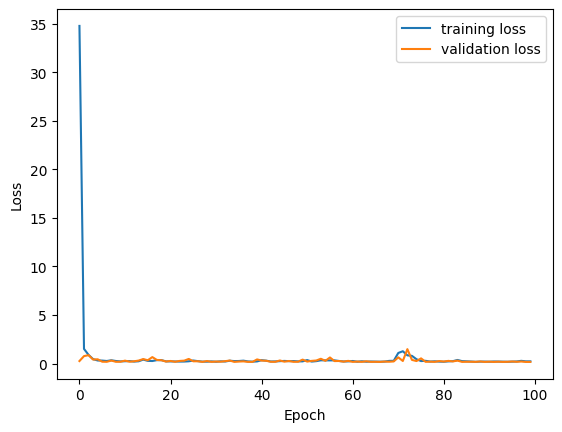

2/2 [==============================] - 0s 5ms/step
MAE: 0.25416462358048086
MSE: 0.18241767999922828


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow import keras
# Create and compile the model
MODEL = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)
])

MODEL.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mse'])

# Train the model on unscaled data
history = MODEL.fit(X_train, y_train, epochs=100, validation_split=0.5)

# Plot the learning rate loss graph
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the unscaled test set
y_pred = MODEL.predict(X_test)

# Calculate Mean Absolute Error (MAE) and Mean Squared Error (MSE) on the original scale
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')


In [50]:
def weights_to_cpp(model, filename="weights_and_biases.txt"):
    model.summary()
    weights = []
    biases = []
    for l in range(len(model.layers)):
        W, B = model.layers[l].get_weights()
        weights.append(W.flatten())
        biases.append(B.flatten())

    z = []
    b = []
    for i in np.array(weights):
        for l in i:
            z.append(l)
    for i in np.array(biases):
        for l in i:
            b.append(l)
    with open(filename, "w") as f:
      f.write("weights: {")
      for i in range(len(z)):
        if (i < len(z)-1):
          f.write(str(z[i])+", ")
        else:
          f.write(str(z[i]))
      f.write("}\n\n")

      f.write("biases: {")
      for i in range(len(b)):
        if (i < len(b)-1):
          f.write(str(b[i])+", ")
        else:
          f.write(str(b[i]))
      f.write("}\n\n")

      arch = []

      arch.append(model.layers[0].input_shape[1])
      for i in range(1, len(model.layers)):
          arch.append(model.layers[i].input_shape[1])
      arch.append(model.layers[len(model.layers)-1].output_shape[1])
      f.write("Architecture: {")
      for i in range(len(arch)):
          if (i < len(arch)-1):
              f.write(str(arch[i])+", ")
          else:
              f.write(str(arch[i]))
      f.write("}")
      print("Architecture (alpha):", arch)
      print("Layers: ", len(arch))
    print("Weights: ", z)
    print("Biases: ", b)




In [51]:
weights_to_cpp(MODEL, filename="weights_and_biases.txt")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                128       
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Architecture (alpha)

<ipython-input-50-dfe5e3fbf500>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for i in np.array(weights):
<ipython-input-50-dfe5e3fbf500>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for i in np.array(biases):


In [52]:
# Save the model to a file
MODEL.save('fish_feed_model_75.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
from keras.models import load_model

# Load the saved model
loaded_model_2 = load_model('fish_feed_model_75.h5')

In [59]:
import numpy as np
import math
from keras.models import load_model

# Load the saved model
loaded_model_2 = load_model('fish_feed_model_75.h5')

# Define your input values

Day = 192
number_of_fishes=30
# Create an input array
input_data = np.array([[Day]])

# Make predictions using the loaded model
fish_feed_prediction = loaded_model_2.predict(input_data)

# Extract the predicted fish feed amount
predicted_feed_amount = fish_feed_prediction[0][0]

predicted_feed_amount_total = predicted_feed_amount*number_of_fishes
# Print the predicted fish_feed
print(f'Predicted Fish Feed: {predicted_feed_amount_total} grams')

# Use the predicted feed amount for the conversion
# Define the conversion factor
grams_per_revolution = 2.5

# Calculate the number of revolutions
revolutions = math.ceil(predicted_feed_amount_total / grams_per_revolution)
print(f'Number of Revolutions: {revolutions}')


1/1 [==============================] - 0s 92ms/step
Predicted Fish Feed: 183.4169626235962 grams
Number of Revolutions: 74
